In [141]:
import nltk
import string
from nltk import word_tokenize, CFG, ChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser


In [142]:
original_sentence = "Lazy cats play with mice."
# [S [NP [JJ] [NNS]] [VP [Vt] [IN] [NNS]]]

grammar = CFG.fromstring('''
    S -> NP VP | NP
    NP -> NNS | JJ NNS | NP CC NP
    VP -> Vt IN NNS
    NNS -> 'cats' | 'dogs' | 'mice' | NNS CC NNS
    JJ -> 'big' | 'small' | 'lazy'
    CC -> 'and' | 'or'
    IN -> 'with'
    Vt -> 'play'
    ''')

In [143]:
def remove_punctuation(token):
    res = ''
    for c in token:
        if c not in string.punctuation:
            res += c
    return res

sent = word_tokenize(remove_punctuation(original_sentence.lower()))

In [144]:
parsers = {}
parsers['ChartParser'] = ChartParser(grammar)
parsers['BottomUpChartParser'] =  BottomUpChartParser(grammar)
parsers['BottomUpLeftCornerChartParser'] = BottomUpLeftCornerChartParser(grammar)
parsers['LeftCornerChartParser'] = LeftCornerChartParser(grammar)

parse = {}
for name, parser in parsers.items():
    for t in parser.parse(sent):
        parse[name] = t


In [145]:
parse['ChartParser']
parse = parser['ChartParser'].chart_parse(['small', 'cats', 'and', 'mice'])

TypeError: 'LeftCornerChartParser' object is not subscriptable

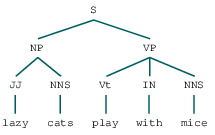

In [139]:
parse['BottomUpChartParser']

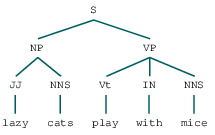

In [114]:
parse['BottomUpLeftCornerChartParser']

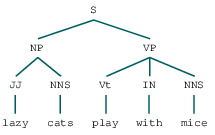

In [115]:
parse['LeftCornerChartParser']